# โหลด R packages และ ข้อมูล

In [11]:
ur_adf_seq <- function(y)
{
  ur.trend <- ur.df(y, type='trend', selectlags = c("AIC"))
  tstat.trend <- ur.trend@teststat
  cv.trend <- ur.trend@cval
  res.trend <- cbind(t(round(tstat.trend,2)),cv.trend)
  nam.trend <- rownames(res.trend)
  nam.trend[agrep("tau", nam.trend)] <- "pi"
  nam.trend[grep("phi2", nam.trend)] <- "varphi2"
  nam.trend[grep("phi3", nam.trend)] <- "varphi3"
  rownames(res.trend) <- nam.trend

  ur.drift <- ur.df(y, type='drift', selectlags = c("AIC"))
  tstat.drift <- ur.drift@teststat
  cv.drift <- ur.drift@cval
  res.drift <- cbind(t(round(tstat.drift,2)),cv.drift)
  nam.drift <- rownames(res.drift)
  nam.drift[agrep("tau", nam.drift)] <- "pi"
  nam.drift[grep("phi1", nam.drift)] <- "varphi1"
  rownames(res.drift) <- nam.drift

  ur.none <- ur.df(y, type='none', selectlags = c("AIC"))
  tstat.none <- ur.none@teststat
  cv.none <- ur.none@cval
  res.none <- cbind(t(round(tstat.none,2)),cv.none)
  nam.none <- rownames(res.none)
  nam.none[agrep("tau", nam.none)] <- "pi"
  rownames(res.none) <- nam.none

  # step 1 : Estimate with constant and trend and Test
  # print summary
  cat(" ", "\n")
  cat("#################", "\n")
  cat("## ADF summary ##", "\n")
  cat("#################", "\n")
  cat(" ", "\n")
  
  res = list(res.trend, res.drift, res.none)
  return(res)
  
  
#   if (res.trend[1,1] <= res.trend[1,3]) {
#     cat("Able to reject null of unit root at 5% - with constant & trend", "\n")
#   }else if (res.trend[1,1] > res.trend[1,3] && res.trend[2,1] >= res.trend[2,3]) {
#     cat("Unable to reject null of unit root at 5% - with constant & trend", "\n")

#   }else if (res.drift[1,1] <= res.drift[1,3]) {
#     cat("Able to reject null of unit root at 5% - with constant", "\n")
#   }else if (res.drift[1,1] > res.drift[1,3] && res.drift[2,1] >= res.drift[2,3]) {
#     cat("Unable to reject null of unit root at 5% - with constant", "\n")

#   }else if (res.none[1,1] <= res.none[1,3]) {
#     cat("Able to reject null of unit root at 5% - no deterministic", "\n")
#   }else {cat("Cannot reject null of unit root at 5% - no deterministic", "\n")}

#   # print results
#   cat(" ", "\n")
#   cat("## ADF with constrant and time trend ##", "\n")
#   print(res.trend)
#   cat(" ", "\n")
#   if (res.trend[1,1] > res.trend[1,3]) {
#     cat("Cannot reject null of unit root at 5%", "\n")
#   }else cat("Able to reject null of unit root at 5%", "\n")
#     if (res.trend[2,1] < res.trend[2,3]) {
#     cat("Cannot reject null of no constant and no trend at 5%", "\n")
#   }else cat("Able to reject null of no constant and no trend at 5%", "\n")
#   if (res.trend[3,1] < res.trend[3,3]) {
#     cat("Cannot reject null of no trend at 5%", "\n")
#   }else cat("Able to reject null of no trend at 5%", "\n")
#   cat(" ", "\n")

#   cat("## ADF with constrant ##", "\n")
#   print(res.drift)
#   cat(" ", "\n")
#   if (res.drift[1,1] > res.drift[1,3]) {
#     cat("Cannot reject null of unit root at 5%", "\n")
#   }else cat("Able to reject null of unit root at 5%", "\n")
#   if (res.drift[2,1] < res.drift[2,3]) {
#     cat("Cannot reject null of no constant at 5%", "\n")
#   }else cat("Able to reject null of no constant at 5%", "\n")
#   cat(" ", "\n")

#   cat("## ADF with no deterministic ##", "\n")
#   print(res.none)
#   cat(" ", "\n")
#   if (res.none[1,1] > res.none[1,3]) {
#     cat("Cannot reject null of unit root at 5%", "\n")
#   }else cat("Able to reject null of unit root at 5%", "\n")
#   cat(" ", "\n")

}

In [8]:
y = price[, 1]

In [12]:
ur_adf_seq(y)

  
################# 
## ADF summary ## 
################# 
  


,statistic,1pct,5pct,10pct
pi,-3.55,-3.98,-3.42,-3.13
varphi2,4.37,6.15,4.71,4.05
varphi3,6.30,8.34,6.30,5.36
,statistic,1pct,5pct,10pct
pi,-1.67,-3.44,-2.87,-2.57
varphi1,1.64,6.47,4.61,3.79
,statistic,1pct,5pct,10pct
pi,-0.02,-2.58,-1.95,-1.62


In [14]:
ur.trend <- ur.df(y, type='trend', selectlags = c("AIC"))

In [29]:
ur.trend@teststat[1]

[1] -3.548251

In [15]:
slotNames(ur.trend)

[1] "y"         "model"     "lags"      "cval"      "res"       "teststat" 
[7] "testreg"   "test.name"

In [30]:
str(ur.trend@testreg)

List of 11
 $ call         : language lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)
 $ terms        :Classes 'terms', 'formula'  language z.diff ~ z.lag.1 + 1 + tt + z.diff.lag
  .. ..- attr(*, "variables")= language list(z.diff, z.lag.1, tt, z.diff.lag)
  .. ..- attr(*, "factors")= int [1:4, 1:3] 0 1 0 0 0 0 1 0 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:4] "z.diff" "z.lag.1" "tt" "z.diff.lag"
  .. .. .. ..$ : chr [1:3] "z.lag.1" "tt" "z.diff.lag"
  .. ..- attr(*, "term.labels")= chr [1:3] "z.lag.1" "tt" "z.diff.lag"
  .. ..- attr(*, "order")= int [1:3] 1 1 1
  .. ..- attr(*, "intercept")= int 1
  .. ..- attr(*, "response")= int 1
  .. ..- attr(*, ".Environment")=<environment: 0x000000001db29bd8> 
  .. ..- attr(*, "predvars")= language list(z.diff, z.lag.1, tt, z.diff.lag)
  .. ..- attr(*, "dataClasses")= Named chr [1:4] "numeric" "numeric" "numeric" "numeric"
  .. .. ..- attr(*, "names")= chr [1:4] "z.diff" "z.lag.1" "tt" "z.diff.lag"
 $ residual

In [34]:
ur.trend@testreg$df[2]

[1] 369

In [26]:
2*stats::pnorm(-abs(3.548))

[1] 0

In [27]:
2*stats::pt(-abs(3.548), 369)

[1] 0.0004382483

In [2]:
price = readRDS('../data/rice/rice_price_filled.rds')

In [1]:
source("../R/oaeTS.R", encoding = "UTF-8")
year_now = 2563

options(
  repr.plot.width=10,
  repr.plot.height=6,
  repr.plot.res=300
)

Loading required package: pacman



In [10]:
price = readRDS('../data/rice/rice_price_filled.rds')
var_names = colnames(price)
colnames(price) = str_replace(colnames(price), "_0", "")
price_xts = price %>% as.xts()
price_log = price
price_log[, startsWith(var_names, 'R')] = 
  price_log[, startsWith(var_names, 'R')] %>% log()
tail(price_log)

,RHFG,RHFG_NR,RHFG_BR,RHFG_SI,RHFG_SU,RHFG_UR,RWFG,RWFG_NS,RWFG_KP,RWFG_PC,RWFG_PS,RWFG_SH,RGFG,RGFG_UN,RGFG_SN,RGFG_KK,RGFG_MS,RGFG_KL,RHWS,RWWS,RGWS,RHXB,RWXB,RGXB,d_foodcrisis,d_pledge
Oct 2019,9.698368,9.692952,9.714262,9.706560,9.694185,9.691531,8.977273,8.944681,8.945072,8.945724,8.937875,8.950403,9.606226,9.721126,9.760252,9.725437,9.682342,9.712206,10.48010,9.363266,10.55414,10.51180,9.451832,10.63612,0,0
Nov 2019,9.569552,9.602112,9.587749,9.586789,9.613068,9.592742,8.972210,8.934060,8.933796,8.930362,8.908559,8.940629,9.547027,9.625294,9.653808,9.614605,9.585759,9.615805,10.41410,9.353301,10.52597,10.46402,9.443005,10.48123,0,0
Dec 2019,9.512591,9.489864,9.497172,9.515101,9.517972,9.515322,8.949625,8.919988,8.897956,8.908830,8.911530,8.947416,9.520249,9.573037,9.624765,9.591991,9.574011,9.534740,10.34335,9.373970,10.48182,10.45268,9.467580,10.44256,0,0
Jan 2020,9.529303,9.536762,9.530611,9.560716,9.536618,9.553363,8.956222,8.912204,8.910316,8.904630,8.925321,8.952347,9.565073,9.687009,9.627734,9.657715,9.660333,9.596759,10.34335,9.430571,10.48252,10.45108,9.517302,10.56501,0,0
Feb 2020,9.540651,9.534234,9.535318,9.559729,9.526756,9.563248,9.007734,8.930230,8.927580,8.932873,8.937481,9.018211,9.597777,9.716375,9.594173,9.681156,9.715108,9.628590,10.34098,9.459665,10.46303,10.45344,9.561999,10.48222,0,0
Mar 2020,9.542221,9.530871,9.536186,9.559543,9.524687,9.563384,9.021624,8.937446,8.930804,8.943172,8.940961,9.030471,9.603651,9.716712,9.581741,9.678454,9.717101,9.620330,10.33039,9.541303,10.39818,10.45488,9.668784,10.40334,0,0


## Plot กราฟ ACF และ PACF

In [11]:
plot_tsexplore = function(y, name = "price", ...){
  
  layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE),
         widths=c(1,1), heights=c(1,.7))
  par(mar = c(4, 2, 3, .2))
  
  plot(y, main = name  , ylab = "", xlab="Year")
  acf( y, main = "ACF" , ylab = "")
  pacf(y, main = "PACF", ylab = "")
}

save_plot_tsexplore = function(data) {
  names = colnames(data)
  
  for(i in seq_along(names)){
    name = names[i]
    y = data[, i] %>% na.omit()
    
    filename = paste0("../img/plot_", name, ".png")
    png(filename = filename,
      units = "in", 
      width = 5, 
      height = 4, 
      pointsize = 10, 
      res = 300)
    
    plot_tsexplore(y, name)
    
    dev.off()
  }
}

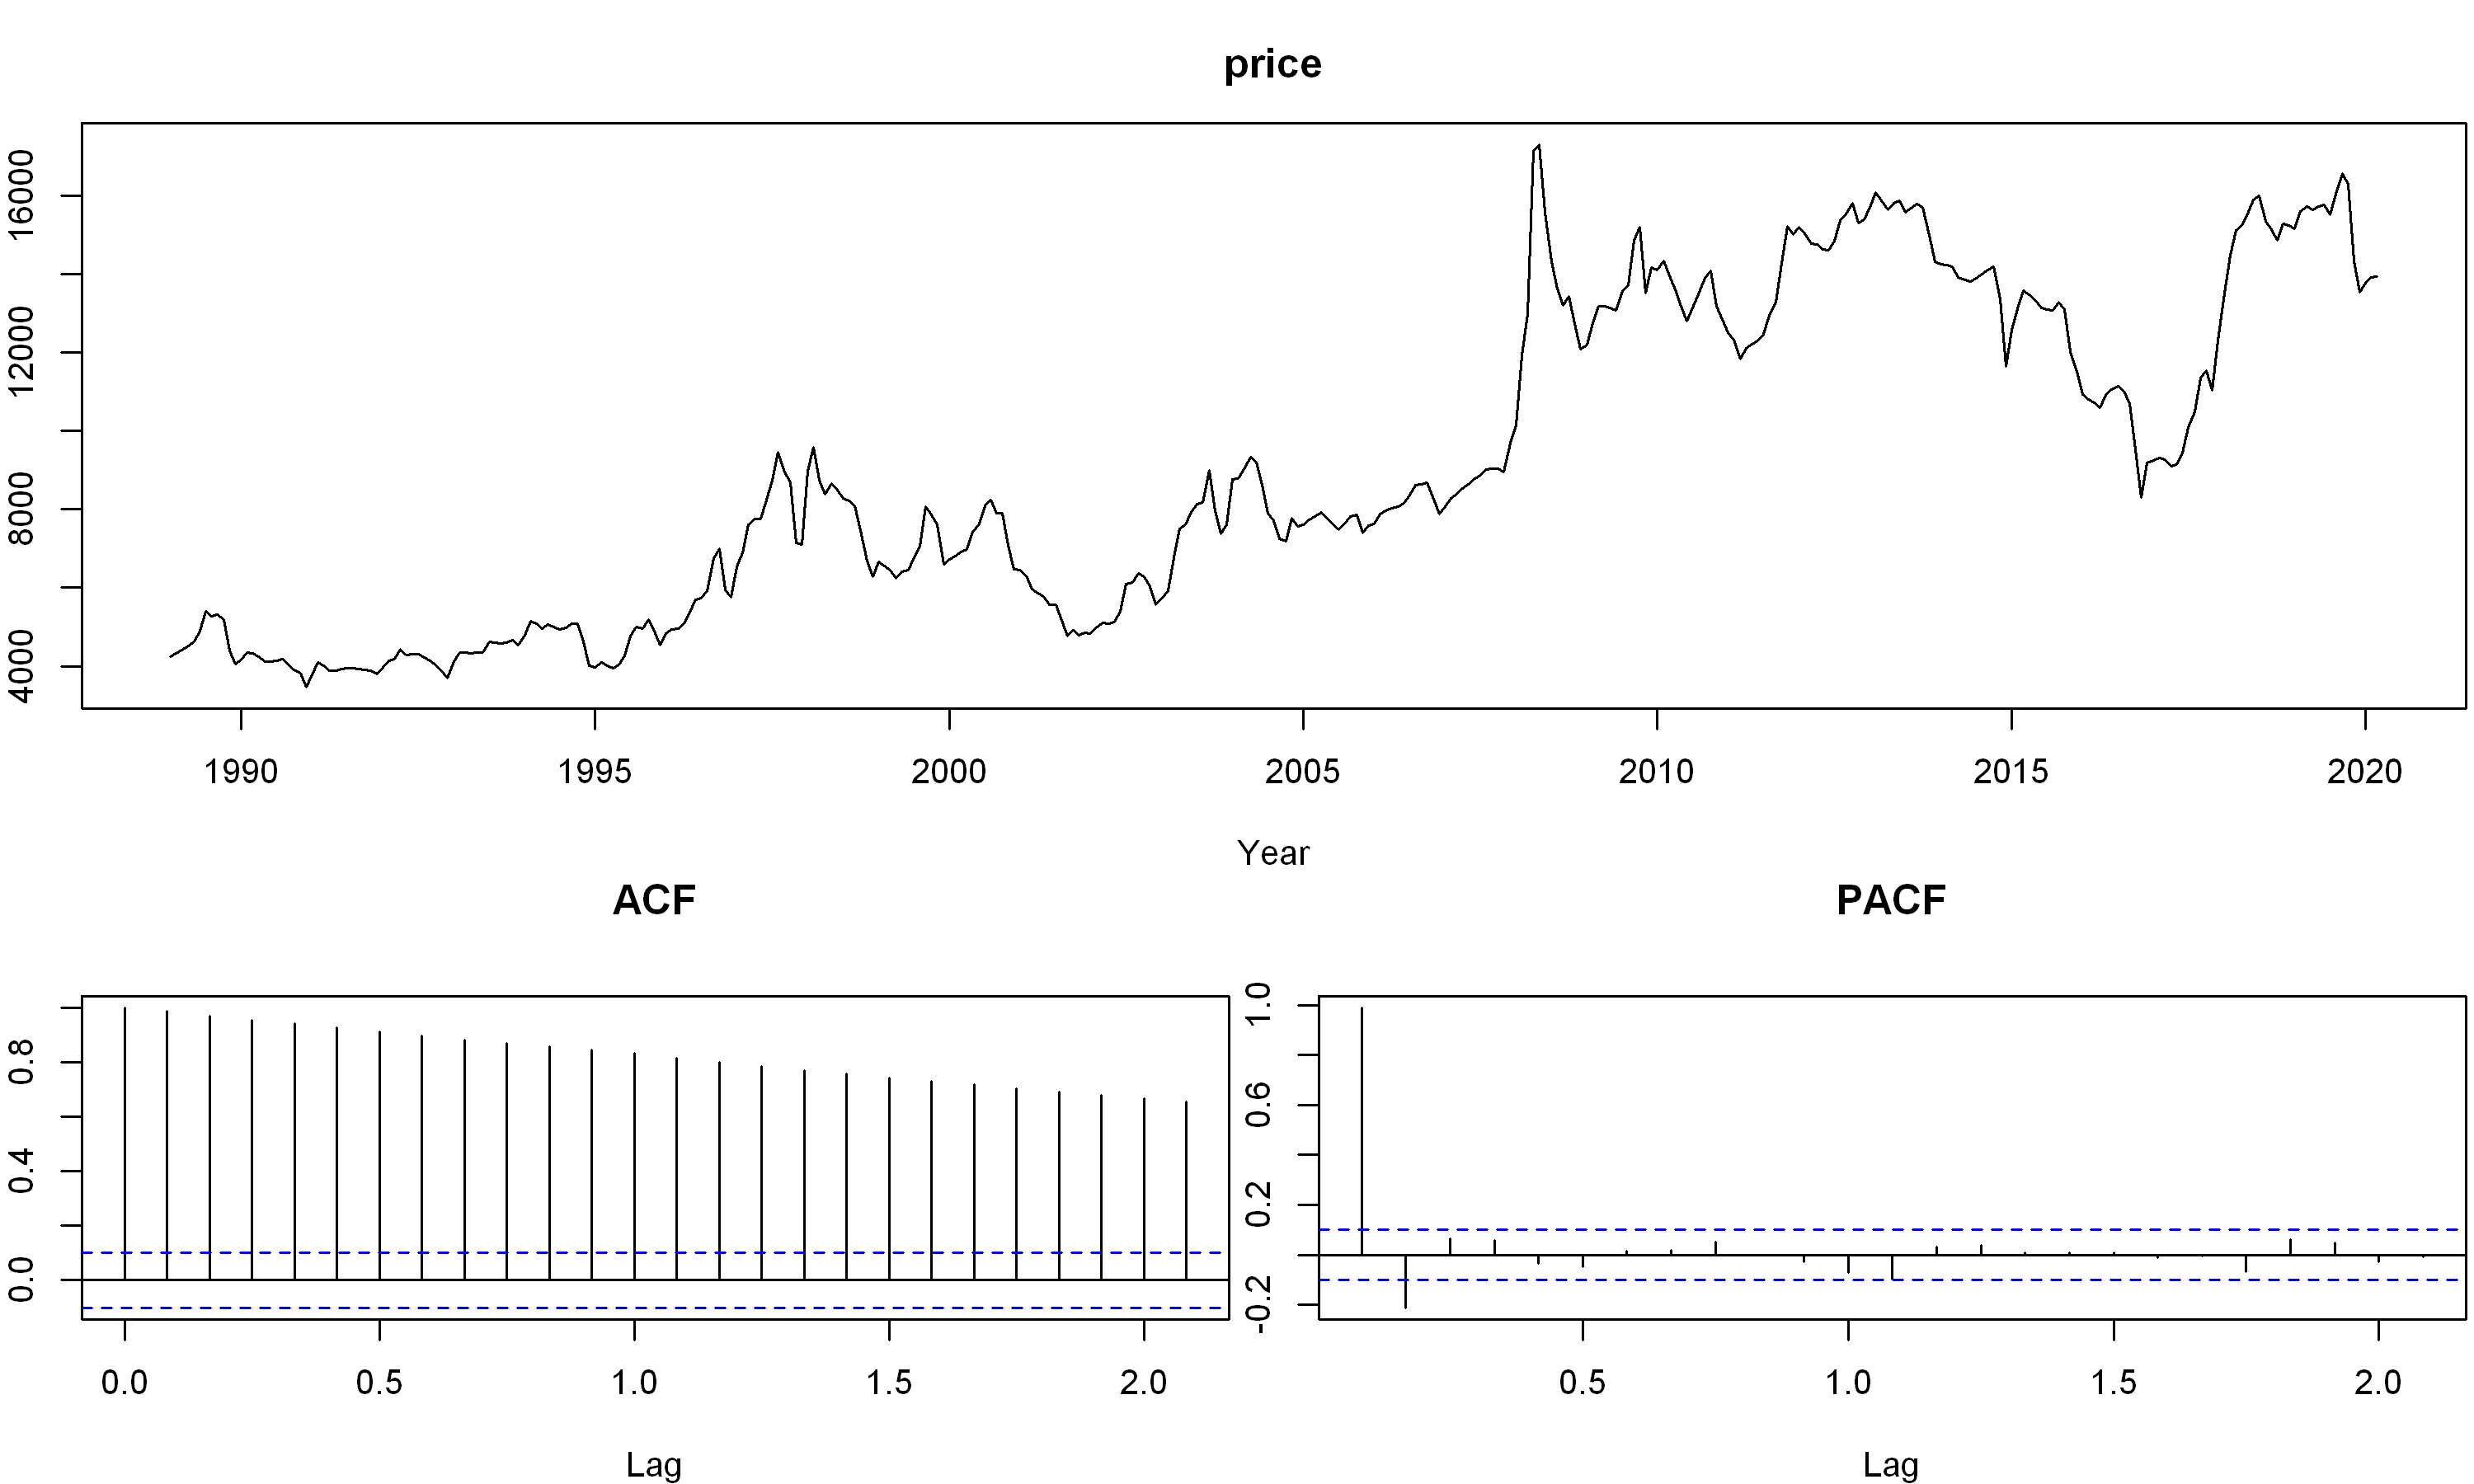

In [12]:
# ทดสอบ
y = price[, 1] %>% na.omit()
plot_tsexplore(y)

In [5]:
# save_plot_tsexplore(price)

## แยกข้อมูลราคาออกเป็นกลุ่ม

In [17]:
rh   = price_log[, c('RHFG', 'RHWS', 'RHXB', 
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()
rw   = price_log[, c('RWFG', 'RWWS', 'RWXB',
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()
rg   = price_log[, c('RGFG', 'RGWS', 'RGXB', 
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()

rhfg = price_log[, c('RHFG_NR', 'RHFG_BR', 'RHFG_SI', 'RHFG_SU', 'RHFG_UR',
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()
rwfg = price_log[, c('RWFG_NS', 'RWFG_KP', 'RWFG_PC', 'RWFG_PS', 'RWFG_SH',
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()
rgfg = price_log[, c('RGFG_UN', 'RGFG_SN', 'RGFG_KK', 'RGFG_MS', 'RGFG_KL', 
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()

rfg  = price_log[, c('RHFG', 'RWFG', 'RGFG', 
                     'd_foodcrisis', 'd_pledge')] %>% na.omit()

rice_list = list(rh, rw, rg, rhfg, rwfg, rgfg, rfg) %>%
  set_names(c('rh', 'rw', 'rg', 'rhfg', 'rwfg', 'rgfg', 'rfg'))

## สร้าง helper function ในการทดสอบ stationary

In [15]:
star_tstat = function (tstat, cval=NULL, pval=NULL) {
  # cval need to be vector with name
  rounded = format(tstat, digits = 2, nsmall=2)
  
  if (!is.null(cval)) {
    x = case_when(
     abs(tstat) >= abs(cval['cv01']) ~ paste0(rounded, '***'),
     abs(tstat) >= abs(cval['cv05']) ~ paste0(rounded, '** '),
     abs(tstat) >= abs(cval['cv10']) ~ paste0(rounded, '*  '),
     TRUE ~ paste0(rounded, '   ') 
    )
  } else if (!is.null(pval)) {
    x = case_when(
      pval <= 0.01 ~ paste0(rounded, '***'),
      pval <= 0.05 ~ paste0(rounded, '** '),
      pval <= 0.10 ~ paste0(rounded, '*  '),
      TRUE ~ paste0(rounded, '   ')
    )
  }
  
  return(x)
}


report_test = function(ys, ur_test, differences, specs) {
  
  y_names = colnames(ys)
  df = data.frame()
  for (y_name in y_names) {
    y = ys[, y_name]
    df_ = data.frame()
    for (n_diff in differences) {
      for (spec in specs) {
        res = ur_test(y, n_diff = n_diff, spec = spec)
        df_ = df_ %>% rbind(res)
      }
    }
    df_['variable'] = y_name 
    df = df %>% rbind(df_)
  }
  
  return(df %>% select(variable, everything()))
}

# ทดสอบ Structural Break

## Zivot-Andrew 1 Break

In [8]:
args(ur.za)
getSlots("ur.za")

function (y, model = c("intercept", "trend", "both"), lag = NULL) 
NULL

y       model         lag    teststat        cval      bpoint 
   "vector" "character"   "integer"   "numeric"    "vector"   "integer" 
     tstats         res     testreg   test.name 
   "vector"    "vector"       "ANY" "character"

In [ ]:
# for (lag in rev(0:10)) {
#   obj = ur.za(y, model = "intercept", lag = lag)
#   coef = summary(obj@testreg)$coefficients
#   last_lag = if (obj@model == "both") nrow(coef)-2 else nrow(coef)-1
#   if ( coef[last_lag, 4] < 0.05 ) break # test significant of the last lag
# }

# test = ur.za(y, model = "both", lag = 2)
# summary(test@testreg)$coefficients

# bpoint = test@'bpoint'
# as.Date(y[bpoint])

In [9]:
ur_za = function(y, n_diff = 0,
                 spec = c("ct", "t", "c"),
                 max_lag = 12) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  model = case_when(
    spec == "ct" ~ "both",
    spec == "t"  ~ "trend",
    spec == "c"  ~ "intercept",
  )
  
  # 2 Estimation
  for (lag in rev(0:max_lag)) {
    obj = ur.za(y, model = model, lag = lag)
    coef = summary(obj@testreg)$coefficients
    last_lag = if (model == "both") nrow(coef)-2 else nrow(coef)-1  
    if ( coef[last_lag, 4] < 0.05 ) break # test significant of the last lag
  }
  
  # 3 Report
  n_lag = obj@'lag'
  tstat = obj@'teststat'
  bpoint = obj@bpoint
  cval = obj@'cval'
  names(cval) = c('cv01', 'cv05', 'cv10')
  ZA_bpoint = as.Date(index(as.xts(y))[bpoint])
  ZA_nlag = n_lag
  ZA_tau = star_tstat(tstat, cval)
  
  res = data.frame(difference, spec, ZA_nlag, ZA_tau, ZA_bpoint, 
                   stringsAsFactors = FALSE)
  
  return(res)
}

# test
ur_za(y, spec = "c", max_lag=12)

difference,spec,ZA_nlag,ZA_tau,ZA_bpoint
<chr>,<chr>,<int>,<chr>,<date>
d0,c,12,-4.66*,2007-11-01


In [11]:
report_test(price_log,
            ur_test = ur_za, 
            differences = c(0, 1), 
            specs = c("ct", "c")
           ) -> table_za

write.xlsx2(table_za, '../result/result_za.xlsx', row.names = FALSE)

In [23]:
table_za
# table_za %>% kable() %>% as.character() %>% display_html()

variable,difference,spec,ZA_nlag,ZA_tau,ZA_bpoint
<chr>,<chr>,<chr>,<int>,<chr>,<date>
RHFG,d0,ct,12,-5.41**,2007-11-01
RHFG,d0,c,12,-4.83**,2015-04-01
RHFG,d1,ct,12,-5.11**,1997-08-01
...,...,...,...,...,...
RGXB,d0,c,11,-4.99**,2006-04-01
RGXB,d1,ct,12,-4.21,2007-09-01
RGXB,d1,c,12,-3.95,2018-03-01


## Lee Straz

In [ ]:
source("y.R")
source("LeeStrazicichUnitRootTest.R")
source("LeeStrazicichUnitRootTestParallelization.R")
plot(y)


library(foreach)
library(doSNOW)
library(parallel)

#Define number of cores to use. By default the maximum available number minus one core is used
cl <- makeCluster(max(1, detectCores() - 1))
registerDoSNOW(cl)

myBreaks <- 2
# Assumed break in the series, "crash" - break in intercept; "break" - break in intercept and trend
myModel <- "break"
# Number of lags to be used in fixed specification or maximum number of lags, when using the GTOS method
myLags <- 5

myParallel_LS <- ur.ls.bootstrap(y=y , model = myModel, breaks = myBreaks, lags = myLags, 
                                 method = "GTOS", pn = 0.1, critval = "bootstrap", 
                                 print.results = "print")

In [ ]:
#Bootstrap implementation used in this case is based on Residual Resampling
# Steps involved
# (1) estimation of the initial estimation of y.diff
# (2) use the residuals from (1) to calculate the restricted residuals based on S.tilde
# (3) draw a random sample from the residuals with replacement with the lenght of the original residuals - sample() available in R
# (4) test regression with the pseudo sample y*, which was created with the resampled residuals
# (5) repeat (3) and (4) n.times and save each resulting t-stat from the repetitions
# 
# Bootstrap procedure needs to be done for values of y*, but also the minimum LM stat 
# is calculated for each series, so the test has to be applied to all replicated y* time series.
# Bootstrap the distribution of the t-statistic based on the determined break dates

#-----------------------------------------------------------------------------
# Set the number of replications
#-----------------------------------------------------------------------------

n.sim <- 1000

#-----------------------------------------------------------------------------
# Initialize the parallelization framework
#-----------------------------------------------------------------------------
# 
library(foreach)
library(doSNOW)
library(parallel)

cl <- makeCluster(max(1, detectCores() - 2))
registerDoSNOW(cl)

#Define variable y, which is the variable to be analysed
myVariable <- y

lagmatrix <- function(x, max.lag) {
  embed(c(rep(NA, max.lag), x), max.lag+1)
}

#Add diffmatrix function
diffmatrix <- function(x, max.diff = 1, max.lag = 1) {
  #Add if condition to make it possible to differentiate between matrix and vector                  
  if (is.vector(x) == TRUE ) {
    myx <- embed(c(rep(NA,max.lag), diff(x,max.lag,max.diff)), max.diff)
    colnames(myx) <- paste("v1.d",max.diff, sep=".")
    return(myx)
  } else if (is.matrix(x) == TRUE) {
    myx <- rbind(matrix(rep(NA,max.lag), ncol = ncol(x)), matrix(diff(x,max.lag,max.diff), ncol = ncol(x)))
    mycolnames <- colnames(x)
    colnames(myx) <- paste(mycolnames,"d",max.diff, sep=".")
    return(myx)
  } else if (as.integer(is.null(ncol(x))) == 0 ) {
    #if matrix the result should be 0, if only a vector it should be 1
    myx <- rbind(matrix(rep(NA,max.lag), ncol = ncol(x)), matrix(diff(x,max.lag,max.diff), ncol = ncol(x)))
    mycolnames <- colnames(x)
    colnames(myx) <- paste(mycolnames,"d",max.diff, sep=".")
    return(myx)
  }
}

n <- length(myVariable)
trend <- 1:n
breaks <- 2
lags <- 1
model <- "break"
myVariable.diff <- diffmatrix(myVariable, max.diff = 1, max.lag = 1)

# Run the test once to determine the values for the break dates
# Definition of all the options needed
test.results.y <- ur.ls.bootstrap(y = myVariable, 
                                  model = model, 
                                  breaks = breaks, 
                                  lags = lags, 
                                  method = "GTOS",
                                  pn = 0.1, 
                                  critval = "bootstrap", 
                                  print.results = "print")

# Define variable Z, which is either Dt or DTt, depending on the model used
# Create Dt and DTt, depending on the breaks, found in the initial application of the LS test

# Define break dates
myBreak1 <- test.results.y[[1]]$`First break`
myBreak2 <- test.results.y[[1]]$`Second break`

In [ ]:
# Dummy with break in intercept and in trend
Dt1 <- as.matrix(cbind(trend, trend >= (myBreak1 + 1)))
DTt1 <- as.matrix(cbind(Dt1, c(rep(0, myBreak1), 1:(n - myBreak1))))
colnames(Dt1) <- c("Trend","D")
colnames(DTt1) <- c("Trend","D","DTt")

Dt2 <-  as.matrix(trend >= (myBreak2 + 1))
DTt2 <- as.matrix(cbind(Dt2, c(rep(0, myBreak2), 1:(n - myBreak2))))
colnames(Dt2) <- c("D2")
colnames(DTt2) <- c("D2","DTt2")

Dt <- cbind(Dt1)
DTt <- cbind(DTt1)

# Combine all Dummies into one big matrix to make it easier to include in the regressions
if (breaks == 1) {
  Dt <- cbind(Dt1)
  DTt <- cbind(DTt1)
} else if (breaks == 2) {
  Dt <- cbind(Dt1, Dt2)
  DTt <- cbind(DTt1, DTt2)
}

if(model == "crash"){
  Z <- Dt
} else if (model == "break"){
  Z <- DTt
}

Z.diff <- diffmatrix(Z, max.diff = 1, max.lag = 1)
#Matrix of coefficients, which omits the NA values
myZcoef <- na.omit(coef(lm(myVariable.diff ~ Z.diff)))

# delta_1 from equation (7) of Chou 2007, which is needed for the manual calculation of S.tilde according to Chou 2007
# equivalent results to the calculation with the cumulated sum
delta_1 <- myVariable[1] - (Z[1,] %*% myZcoef)

#Result is equivalent to the original S.tilde
myS.tilde <- myVariable - as.vector(delta_1) - Z %*% myZcoef
if (model == "crash") {
  y.star <- as.vector(delta_1) + as.vector((Dt %*% myZcoef)) + sample(myS.tilde, size = length(myS.tilde), replace = TRUE)
} else if (model == "break") {
  y.star <- as.vector(delta_1) + as.vector((DTt %*% myZcoef)) + sample(myS.tilde, size = length(myS.tilde), replace = TRUE)
}

In [ ]:
y.star <- as.vector(delta_1) + 
  as.vector((DTt %*% myZcoef)) + 
  sample(myS.tilde, size = length(myS.tilde), replace = TRUE)

In [ ]:
as.Date(index(as.xts(y))[311])

In [ ]:
n = 200
u = rnorm(n)
trd = 1:n
sumu = cumsum(u)
y = 10 + 0.3*trd + sumu
plot(y)

In [ ]:
cval.one.constant = matrix(c(-4.239, -3.566, -3.211), nrow = 1, ncol = 3, byrow = TRUE)
colnames(cval.one.constant) <- c("1%","5%","10%")
cval.one.constant

In [ ]:
cval.one.crash = matrix(c(-4.239, -3.566, -3.211), nrow = 1, ncol = 3, byrow = TRUE)
colnames(cval.one.crash) <- c("cv01", "cv05", "cv10")

cval.one.break <- matrix(c(.1, -5.11, -4.50, -4.21,
                           .2, -5.07, -4.47, -4.20,
                           .3, -5.15, -4.45, -4.18,
                           .4, -5.05, -4.50, -4.18,
                           .5, -5.11, -4.51, -4.17,
                           .6, -5.05, -4.50, -4.18,
                           .7, -5.15, -4.45, -4.18,
                           .8, -5.07, -4.47, -4.20,
                           .9, -5.11, -4.50, -4.21),
                         nrow = 9, ncol = 4, byrow = TRUE)
colnames(cval.one.break) <- c("lambda1", "cv01", "cv05", "cv10")


cval.two.crash = matrix(c(-4.545, -3.842, -3.504), nrow = 1, ncol = 3, byrow = TRUE)
colnames(cval.two.crash) <- c("cv01", "cv05", "cv10")

cval.two.break = matrix(c(.2, .4, -6.16, -5.59, -5.27,
                          .2, .6, -6.41, -5.74, -5.32,
                          .2, .8, -6.33, -5.71, -5.33,
                          .4, .6, -6.45, -5.67, -5.31,
                          .4, .8, -6.42, -5.65, -5.32,
                          .6, .8, -6.32, -5.73, -5.32),
                        nrow = 6, ncol = 5, byrow = TRUE)
colnames(cval.two.break) <- c("lambda1", "lambda2", "cv01", "cv05", "cv10")

In [ ]:
cval.one.trend[cval.one.trend[, 1] == 0.3, 2:4]

In [ ]:
# y = price[, 1] %>% log()
model <- "break"
breaks <- 2
lags <- 12

test.results.y <- ur.ls.bootstrap(y = y, 
                                  model = model, 
                                  breaks = breaks, 
                                  lags = lags, 
                                  method = "GTOS",
                                  pn = 0.1, 
                                  critval = "theoretical", 
                                  print.results = "print")

test.results.y

In [ ]:
library(interp)

In [ ]:
p_load('pracma')

In [ ]:
x <- c(0.5, 1, 2)
y <- c(0.5, 1, 2)
mgrid <- meshgrid(x, y)
Z <- mgrid$X^2 + mgrid$Y^2
# Z[2,1] <- NA
# Z[3,1] <- NA
# Z[3,2] <- NA
xp <- yp <- linspace(-1, 1, 101)

method <- "nearest"
zp <- interp2(x, y, Z, 1.2, 1, method)
zp

In [ ]:
1.4**2 + 1

In [ ]:
data(franke)
plot(y ~ x, data = akima, main = "akima example data")
with(akima, text(x, y, formatC(z,dig=2), adj = -0.1))

## linear interpolation
akima.li <- interp(akima$x, akima$y, akima$z)

In [ ]:
x = 1:10
y = 1:10
z = x+y

akima.li = interp(x, y, z)

In [ ]:
example(interp)

In [ ]:
# str(test.results.y)

In [ ]:
ur.kpss(y)

In [ ]:
args(ur.df)

In [ ]:
test@cval

In [ ]:
test = ur.df(y, type = "trend")
summary(test)

In [ ]:
summary(ur.pp(y))

In [ ]:
colnames(boot.y) = c("t-stat","First break", "Second break", "Runtime")
boot.y

In [ ]:
#Loop for the actual boot strapping procedure
model <- "break"
breaks <- 2
lags <- 1
y.star <- as.vector(delta_1) + 
  as.vector((Z %*% myZcoef)) + 
  sample(myS.tilde, size = length(myS.tilde), replace = TRUE)

boot.y <- foreach(i=1:20, .combine = rbind, .packages = 'foreach') %dopar%
  test.stat <- ur.ls.bootstrap(y = y.star, 
                               model = model, 
                               breaks = breaks,
                               lags = lags,
                               method = "Fixed",
                               pn = 0.1, 
                               critval = "bootstrap", 
                               print.results = "silent")
  
  if (breaks == 2) {
    return(list(c(unlist(test.stat[[1]]$`t-stat`)), 
                c(unlist(test.stat[[1]]$`First break`)),
                c(unlist(test.stat[[1]]$`Second break`)),
                c(as.numeric(test.stat[[1]]$Runtime, units = "mins")))
          )
  } else if (breaks == 1){
    return(c(c(unlist(test.stat[[1]]$`t-stat`)), 
             c(unlist(test.stat[[1]]$`First break`)), 
             c(as.numeric(test.stat[[1]]$Runtime, units = "mins")))
          )
  }
}

In [ ]:
#Calculate the critical values, based on the distribution of the test statistic
hist(unlist(boot.y[,"t-stat"]), freq = FALSE)
quantile(unlist(boot.y[,"t-stat"]), c(.01, .05, .1, .25, .5, .75, .95, .99))
quantile(unlist(boot.y[,"First break"]), c(.01, .05, .1, .25, .5, .75, .95))
quantile(unlist(boot.y[,"Second break"]), c(.01, .05, .1, .25, .5, .75, .95))

In [ ]:
hist(unlist(boot.y[,"First break"]), freq = FALSE)

# ทดสอบ Seasonal Unit Root

## HEGY Test

In [18]:
args(hegy.test)

function (x, deterministic = c(1, 0, 0), lag.method = c("fixed", 
    "AIC", "BIC", "AICc"), maxlag = 0, pvalue = c("RS", "bootstrap", 
    "raw"), rs.nobsreg = 15, boot.args = list(seed = 123, lag.method = lag.method[1], 
    maxlag = maxlag, byseason = FALSE, nb = 1000, BTdim = c(100, 
        10), debug.tid = -1)) 
NULL

In [26]:
test = hegy.test(y)
names(test)

[1] "statistics"       "pvalues"          "method"           "data.name"       
 [5] "fitted.model"     "lag.method"       "lag.order"        "strdet"          
 [9] "type.pvalue"      "bootstrap"        "boot.chosen.lags" "pvlabels"

In [19]:
ur_hegy = function(y, n_diff = 0,
                   spec = c("cts", "ct", "cs", "c"),
                   max_lag = 12) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  deterministic = case_when(
    spec == "cts" ~ c(1,1,1),
    spec == "ct"  ~ c(1,1,0),
    spec == "cs"  ~ c(1,0,1),
    spec == "c"   ~ c(1,0,0),
  )
  
  # 2 Estimation
  obj = hegy.test(y, 
                  deterministic = deterministic, 
                  maxlag = max_lag,
                  lag.method = "AIC", 
                  pvalue = "RS"
                 )
  
  # 3 Report
  tstat = obj$statistics
  pval = obj$pvalues
  nlag = obj$lag.order
  
  test_star = star_tstat(tstat, pval=pval)
  names(test_star) = names(tstat)
  
  res = data.frame(difference, spec, nlag, t(test_star),
                   stringsAsFactors = FALSE)
  
  return(res)
}

# test
ur_hegy(y, spec = "cs")

difference,spec,nlag,t_1,t_2,F_3.4,F_5.6,F_7.8,F_9.10,F_11.12,F_2.12,F_1.12
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
d0,cs,0,-1.35,-5.48***,24.86***,29.91***,39.93***,36.61***,35.83***,543.76***,498.63***


In [21]:
report_test(price_log, 
            ur_test = ur_hegy, 
            differences = c(0, 12), 
            specs = c("cts", "ct", "cs", "c")
           ) -> table_hegy

write.xlsx2(table_hegy, '../result/result_hegy.xlsx', row.names = FALSE)

In [22]:
table_hegy
# table_hegy %>% kable() %>% as.character() %>% display_html()

variable,difference,spec,nlag,t_1,t_2,F_3.4,F_5.6,F_7.8,F_9.10,F_11.12,F_2.12,F_1.12
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
RHFG,d0,cts,2,-3.04*,-4.35***,22.45***,26.35***,23.87***,20.31***,21.26***,24.32***,24.35***
RHFG,d0,ct,2,-3.39**,-4.31***,16.22***,14.24***,15.02***,15.90***,20.82***,17.79***,18.16***
RHFG,d0,cs,2,-1.35,-4.31***,24.55***,27.83***,24.30***,20.14***,20.95***,25.00***,23.29***
...,...,...,...,...,...,...,...,...,...,...,...,...
RGXB,d12,ct,9,-5.35***,-2.81***,24.59***,27.15***,9.85***,22.99***,8.98***,37.84***,42.72***
RGXB,d12,cs,9,-4.63***,-2.74**,21.87***,25.19***,8.75***,20.50***,8.45***,34.97***,38.57***
RGXB,d12,c,9,-4.80***,-2.85***,23.27***,26.74***,9.44***,21.94***,9.28***,37.39***,41.27***


## CH Test

In [24]:
args(ch.test)

function (x, type = c("dummy", "trigonometric"), lag1 = FALSE, 
    NW.order = NULL, sid = NULL, xreg = NULL, pvalue = c("RS", 
        "raw"), rs.nobsreg = 13) 
NULL

In [25]:
test = ch.test(y, type="trigonometric")
names(test)

[1] "statistics"   "pvalues"      "method"       "data.name"    "type"        
 [6] "fitted.model" "NW.order"     "lag1"         "isNullxreg"   "type.pvalue" 
[11] "pvlabels"

In [27]:
ur_ch = function(y, n_diff = 0,
                 spec = c("lag1", "lag0"),
                 max_lag = 12) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  lag1 = case_when(
    spec == "lag1" ~ TRUE,
    spec == "lag0" ~ FALSE,
  )
  
  # 2 Estimation
  obj = ch.test(y, 
                type = "trigonometric",
                lag1 = lag1, 
                NW.order = max_lag,
                pvalue = "RS"
               )
  
  # 3 Report
  tstat = obj$statistics
  names(tstat)= c("pi16", "pi26", "pi36", 
                  "pi46", "pi56", "pi", "joint")
  pval = obj$pvalues
  nlag = obj$NW.order
  
  test_star = star_tstat(tstat, pval=pval)
  names(test_star) = names(tstat)
  
  res = data.frame(difference, spec, nlag, t(test_star),
                   stringsAsFactors = FALSE)
  
  return(res)
}

# test
ur_ch(y, spec = "lag1")

difference,spec,nlag,pi16,pi26,pi36,pi46,pi56,pi,joint
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
d0,lag1,12,0.12,0.32,0.25,0.24,0.36,0.25,1.39


In [30]:
report_test(price_log, 
            ur_test = ur_ch, 
            differences = c(0, 12), 
            specs = c("lag1")
           ) -> table_ch

write.xlsx2(table_ch, '../result/result_ch.xlsx', row.names = FALSE)

In [31]:
table_ch

variable,difference,spec,nlag,pi16,pi26,pi36,pi46,pi56,pi,joint
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
RHFG,d0,lag1,12,0.38,0.53,0.84**,0.83**,0.45,0.32,2.20
RHFG,d12,lag1,12,0.084,0.048,0.057,0.058,0.058,0.020,0.317
RHFG_NR,d0,lag1,12,0.49,0.59,0.53,0.50,0.34,0.19,1.59
...,...,...,...,...,...,...,...,...,...,...
RWXB,d12,lag1,12,0.104,0.153,0.079,0.075,0.120,0.030,0.767
RGXB,d0,lag1,12,0.096,0.141,0.258,0.702*,0.445,0.067,1.607
RGXB,d12,lag1,12,0.11,0.11,0.28,0.26,0.25,0.11,0.96


# ทดสอบ Unit Root

## ADF

In [32]:
args(ur.df)
getSlots("ur.df")

function (y, type = c("none", "drift", "trend"), lags = 1, selectlags = c("Fixed", 
    "AIC", "BIC")) 
NULL

y       model        lags        cval         res    teststat 
   "vector" "character"   "integer"    "matrix"    "vector"    "matrix" 
    testreg   test.name 
      "ANY" "character"

In [33]:
ur_adf = function(y, n_diff = 0,
                  spec = c("ct", "c", "n"),
                  max_lag = 12) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  type = case_when(
    spec == "ct" ~ "trend",
    spec == "c"  ~ "drift",
    spec == "n"  ~ "none",
  )
  
  # 2 Estimation
  for (lag in rev(0:max_lag)) {
    obj = ur.df(y, type = type, lags = lag, selectlags = "Fixed")
    coef = obj@testreg$coefficients
    if ( 0.05 > coef[nrow(coef), 4] ) break # test significant of the last lag
  }
  
  # 3 Report
  n_coef = (obj@'testreg'$'coefficients') %>% nrow()
  model = obj@'model'
  n_lag = case_when(
    model == "none"  ~ n_coef-1,
    model == "drift" ~ n_coef-2,
    model == "trend" ~ n_coef-3,
  )
  
  tstat = obj@'teststat' %>% t()
  
  cval = obj@'cval'
  colnames(cval) = c('cv01', 'cv05', 'cv10')
  
  tau = tstat[1]
  cval_tau  = cval[1,]
  
  phi = if(model != "none") tstat[nrow(tstat)] else NA
  cval_phi = if(model != "none") cval[nrow(tstat),] else NA
  
  ADF_nlag = n_lag
  ADF_tau = star_tstat(tau, cval_tau)
  ADF_phi = star_tstat(phi, cval_phi)
  
  res = data.frame(difference, spec, ADF_nlag, ADF_tau, ADF_phi, 
                   stringsAsFactors = FALSE)
  
  return(res)
}

# test
ur_adf(y, spec = "ct", max_lag=12)

difference,spec,ADF_nlag,ADF_tau,ADF_phi
<chr>,<chr>,<dbl>,<chr>,<chr>
d0,ct,12,-3.41*,5.82*


## PP

In [35]:
args(ur.pp)
getSlots("ur.pp")

function (x, type = c("Z-alpha", "Z-tau"), model = c("constant", 
    "trend"), lags = c("short", "long"), use.lag = NULL) 
NULL

y        type       model         lag        cval    teststat 
   "vector" "character" "character"   "integer"    "matrix"   "numeric" 
    testreg     auxstat         res   test.name 
      "ANY"    "matrix"    "vector" "character"

In [34]:
ur_pp = function(y, n_diff = 0,
                 spec = c("ct", "c"),
                 lag_method = c("long", "short")) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  model = case_when(
    spec == "ct" ~ "trend",
    spec == "c"  ~ "constant"
  )
  
  lag_method = match.arg(lag_method)
  
  # 2 Estimation
  obj = ur.pp(y, type = "Z-tau", model = model, lags = lag_method)
  
  # 3 Report
  model = obj@'model'
  n_lag = obj@'lag'
  tstat = obj@'teststat'
  cval = obj@'cval'
  colnames(cval) = c('cv01', 'cv05', 'cv10')
  cval = cval[1,]
  
  PP_nlag = n_lag
  PP_zta = star_tstat(tstat, cval) # zta means Z-tau-alpha
  
  res = data.frame(difference, spec, PP_nlag, PP_zta, 
                   stringsAsFactors = FALSE)

  return(res)
}

# test
ur_pp(y, spec="ct")

difference,spec,PP_nlag,PP_zta
<chr>,<chr>,<int>,<chr>
d0,ct,16,-2.96


## DFGLS

In [36]:
args(ur.ers)
getSlots("ur.ers")

function (y, type = c("DF-GLS", "P-test"), model = c("constant", 
    "trend"), lag.max = 4) 
NULL

y          yd        type       model         lag        cval 
   "vector"    "vector" "character" "character"   "integer"    "matrix" 
   teststat     testreg   test.name 
  "numeric"       "ANY" "character"

In [37]:
ur_dfgls = function(y, n_diff = 0,
                    spec = c("ct", "c", "n"),
                    max_lag = 12) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  model = case_when(
    spec == "ct" ~ "trend",
    spec == "c"  ~ "constant",
  )
  
  # 2 Estimation
  for (lag in rev(0:max_lag)) {
    obj = ur.ers(y, type = "DF-GLS", model = model, lag.max = lag) # model = "trend"
    coef = obj@testreg$coefficients
    if ( 0.05 > coef[nrow(coef), 4] ) break # test significant of the last lag
  }
  
  # 3 Report
  type = obj@'type'
  model = obj@'model'
  n_lag = obj@'lag'
  tstat = obj@'teststat'
  cval = obj@'cval'
  colnames(cval) = c('cv01', 'cv05', 'cv10')
  cval = cval[1,]
  
  DFGLS_nlag = n_lag
  DFGLS_tau = star_tstat(tstat, cval)
  
  res = data.frame(difference, spec, DFGLS_nlag, DFGLS_tau, 
                   stringsAsFactors = FALSE)

  return(res)
}

# test
ur_dfgls(y, spec = "c", max_lag=12)

difference,spec,DFGLS_nlag,DFGLS_tau
<chr>,<chr>,<int>,<chr>
d0,c,12,-0.51


## KPSS

In [38]:
args(ur.kpss)
getSlots("ur.kpss") # mu = constant tau = constant with trend

function (y, type = c("mu", "tau"), lags = c("short", "long", 
    "nil"), use.lag = NULL) 
NULL

y        type         lag        cval    teststat         res 
   "vector" "character"   "integer"    "matrix"   "numeric"    "vector" 
  test.name 
"character"

In [39]:
ur_kpss = function(y, n_diff = 0,
                   spec = c("ct", "c"),
                   lag_method = c("long", "short")) {
  
  # 1 Set up
  y = if (n_diff>0) diff(y, n_diff) %>% na.omit() else y %>% na.omit()
  difference = paste0("d", n_diff)
  
  spec = match.arg(spec)
  type = case_when(
    spec == "ct" ~ "tau",
    spec == "c"  ~ "mu",
  )
  
  lag_method = match.arg(lag_method)
  
  # 2 Estimation
  obj = ur.kpss(y, type = type, lags = lag_method)
  
  # 3 Report
  n_lag = obj@'lag'
  tstat = obj@'teststat'
  cval = obj@'cval'
  colnames(cval) = c('cv10', 'cv05', 'cv025', 'cv01')
  cval = cval[, c(4, 2, 1)] # rearrange
  
  KPSS_nlag = n_lag
  KPSS_tau = star_tstat(tstat, cval) # zta means Z-tau-alpha
  
  res = data.frame(difference, spec, KPSS_nlag, KPSS_tau, 
                   stringsAsFactors = FALSE)

  return(res)
}

# test
ur_kpss(y, spec="ct")

difference,spec,KPSS_nlag,KPSS_tau
<chr>,<chr>,<int>,<chr>
d0,ct,16,0.12


## All tests

In [41]:
ur_tests = list(ur_adf, ur_dfgls, ur_pp, ur_kpss)

lapply(ur_tests,
       report_test, 
       ys = price_log,
       differences = c(0, 1), 
       specs = c("ct", "c")
      ) %>% reduce(merge) -> table_ur

write.xlsx2(table_ur, '../result/result_ur.xlsx', row.names = FALSE)

In [42]:
table_ur
# table_ur %>% kable() %>% as.character() %>% display_html() 
# ur_result = ur_report(price)
# write_csv(ur_result, '../result/unit_root_table.csv')
# res_ch = uroot::ch.test(y, type ="dummy", pvalue = "raw")
# res_hegy = uroot::hegy.test(y, deterministic = c(1,1,1), lag.method="AIC")

variable,difference,spec,ADF_nlag,ADF_tau,ADF_phi,DFGLS_nlag,DFGLS_tau,PP_nlag,PP_zta,KPSS_nlag,KPSS_tau
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
RGFG,d0,c,12,-1.90,2.21,12,-0.46,16,-1.29,16,2.02***
RGFG,d0,ct,12,-5.09***,12.95***,12,-5.06***,16,-3.23*,16,0.12
RGFG,d1,c,12,-4.02***,8.11***,12,-3.28***,16,-13.22***,16,0.028
...,...,...,...,...,...,...,...,...,...,...,...
RWXB,d0,ct,1,-2.76,3.85,1,-2.14,14,-2.37,14,0.27***
RWXB,d1,c,0,-9.18***,42.13***,9,-1.52,14,-8.58***,14,0.13
RWXB,d1,ct,0,-9.15***,41.98***,8,-3.03**,14,-8.52***,14,0.059


# ทดสอบ Cointegration

In [18]:
args(ca.jo)
getSlots("ca.jo")

function (x, type = c("eigen", "trace"), ecdet = c("none", "const", 
    "trend"), K = 2, spec = c("longrun", "transitory"), season = NULL, 
    dumvar = NULL) 
NULL

x          Z0          Z1          ZK        type       model 
      "ANY"    "matrix"    "matrix"    "matrix" "character" "character" 
      ecdet         lag           P      season      dumvar        cval 
"character"   "integer"   "integer"       "ANY"       "ANY"       "ANY" 
   teststat      lambda        Vorg           V           W          PI 
      "ANY"    "vector"    "matrix"    "matrix"    "matrix"    "matrix" 
      DELTA       GAMMA          R0          RK          bp        spec 
   "matrix"    "matrix"    "matrix"    "matrix"       "ANY" "character" 
       call   test.name 
     "call" "character"

In [72]:
ca_jo = function(data, include_dum = TRUE, type = 'trace',
                 ecdet = 'trend', spec = 'transitory', ...) {
  n_var = ncol(data) - 2
  endo = data[, 1:n_var]
  dum = data[, (n_var+1):ncol(data)]
  dumvar = if(include_dum == TRUE) dum else NULL
  
  res = ca.jo(
    x = endo,
    type = type, 
    ecdet = ecdet,
    spec = spec,
    dumvar = dum,
    ...
  )

  return(res)
}

In [73]:
ca_jo(rice_list[[1]])


##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 5.863 27.5624 61.9062 


In [75]:
result_cajo = rice_list %>%
  map(ca_jo)

In [78]:
result_cajo %>% map(summary)

$rh

###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.542492e-01 1.004410e-01 2.819493e-02 2.321737e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  5.86 10.49 12.25 16.26
r <= 1 | 27.56 22.76 25.32 30.45
r = 0  | 61.91 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHFG.l1       RHWS.l1      RHXB.l1    trend.l1
RHFG.l1   1.0000000000  1.0000000000  1.000000000  1.00000000
RHWS.l1  -1.2470163139  1.4777436724 -1.301016759  0.69977887
RHXB.l1   0.2999195289 -2.0843346900 -1.285675991 -1.37528412
trend.l1  0.0004406211 -0.0005475334  0.006005925 -0.01445594

Weights W:
(This is the loading matrix)

           RHFG.l1     RHWS.l1    RHXB.l1      trend.l1
RHFG.d -0.16218295 -0.06286233 0.01262062  2.070520e-15
RHWS.d -0.01242251 -0.02846757 0.02306221 -

In [47]:
var_names = colnames(rice_list[[1]])
dum_names = c('d_foodcrisis', 'd_pledge')
var_names = var_names[!(var_names %in% dum_names)]

In [51]:
endo = rice_list[[1]][, var_names]
dum = rice_list[[1]][, dum_names]

In [81]:
saveRDS(rice_list, '../data/rice/rice_price_list.rds')

In [55]:
ca.jo(
  x = endo,
  type ="trace", 
  ecdet = "trend",
  spec = 'transitory'
) %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.128115e-01 7.940060e-02 2.345141e-02 3.469447e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.86 10.49 12.25 16.26
r <= 1 | 21.82 22.76 25.32 30.45
r = 0  | 46.36 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              RHFG.l1       RHWS.l1     RHXB.l1    trend.l1
RHFG.l1   1.000000000  1.0000000000  1.00000000  1.00000000
RHWS.l1  -2.790655568 -0.1200511727 -4.25402632 -0.06922186
RHXB.l1   1.593474891 -0.8084959062 -6.61879018 -0.36271786
trend.l1  0.001361309  0.0004787167  0.02966762 -0.01090255

Weights W:
(This is the loading matrix)

           RHFG.l1       RHWS.l1     RHXB.l1      trend.l1
RHFG.d -0.02048203 -0.1101282851 0.002550517 -1.009245e-15
RHWS.d  0.02211338 -0.0006403358 0.003317889  3.935

In [54]:
ca.jo(
  x = endo,
  type ="trace", 
  ecdet = "trend",
  spec = 'transitory',
  dumvar = dum
) %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.542492e-01 1.004410e-01 2.819493e-02 2.321737e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  5.86 10.49 12.25 16.26
r <= 1 | 27.56 22.76 25.32 30.45
r = 0  | 61.91 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHFG.l1       RHWS.l1      RHXB.l1    trend.l1
RHFG.l1   1.0000000000  1.0000000000  1.000000000  1.00000000
RHWS.l1  -1.2470163139  1.4777436724 -1.301016759  0.69977887
RHXB.l1   0.2999195289 -2.0843346900 -1.285675991 -1.37528412
trend.l1  0.0004406211 -0.0005475334  0.006005925 -0.01445594

Weights W:
(This is the loading matrix)

           RHFG.l1     RHWS.l1    RHXB.l1      trend.l1
RHFG.d -0.16218295 -0.06286233 0.01262062  2.070520e-15
RHWS.d -0.01242251 -0.02846757 0.02306221 -9.46

In [61]:
result_cajo = rice_list %>%
  map(
    rice_list
    ca.jo,
    type ="trace", 
    ecdet = "trend",
    spec = 'transitory',
    dumvar = 
  )

In [62]:
result_cajo %>%
  map(summary)

$rh

###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.128115e-01 7.940060e-02 2.345141e-02 3.469447e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.86 10.49 12.25 16.26
r <= 1 | 21.82 22.76 25.32 30.45
r = 0  | 46.36 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              RHFG.l1       RHWS.l1     RHXB.l1    trend.l1
RHFG.l1   1.000000000  1.0000000000  1.00000000  1.00000000
RHWS.l1  -2.790655568 -0.1200511727 -4.25402632 -0.06922186
RHXB.l1   1.593474891 -0.8084959062 -6.61879018 -0.36271786
trend.l1  0.001361309  0.0004787167  0.02966762 -0.01090255

Weights W:
(This is the loading matrix)

           RHFG.l1       RHWS.l1     RHXB.l1      trend.l1
RHFG.d -0.02048203 -0.1101282851 0.002550517 -1.009245e-15
RHWS.d  0.02211338 -0.0006403358 0.003317889  3